# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

In [2]:
# import zipfile

# with zipfile.ZipFile('./landmark_images.zip', 'r') as zip_ref:

#     zip_ref.extractall('./landmark_images/')

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [3]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import torch

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

import torchvision

from torchvision import datasets, models, transforms

from torch.utils.data.sampler import SubsetRandomSampler

%matplotlib inline

In [5]:
### Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_scratch = {'train': None, 'valid': None, 'test': None}

In [6]:
train_data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(9),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]
    )
])

test_data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]
    )
])

In [7]:
train_data = datasets.ImageFolder(
    './landmark_images/train/',
    transform = train_data_transform
)

test_data = datasets.ImageFolder(
    './landmark_images/test/',
    transform = test_data_transform
)

In [8]:
data_indices = list(range(len(train_data)))

np.random.shuffle(data_indices)

split_reference = int(np.floor(0.2 * len(train_data)))

train_indices = data_indices[split_reference:]

validation_indices = data_indices[:split_reference]

In [9]:
validation_sampler = SubsetRandomSampler(validation_indices)

train_sampler = SubsetRandomSampler(train_indices)

In [10]:
loaders_scratch["train"] = torch.utils.data.DataLoader(
    train_data,
    batch_size = 5,
    sampler = train_sampler,
    num_workers = 0
)

loaders_scratch["valid"] = torch.utils.data.DataLoader(
    train_data, 
    batch_size = 5,      
    sampler = validation_sampler, 
    num_workers = 0
)

loaders_scratch["test"] = torch.utils.data.DataLoader(
    test_data,
    batch_size = 5
)

In [11]:
print(len(loaders_scratch["train"]))

print(len(loaders_scratch["valid"]))

print(len(loaders_scratch["test"]))

800
200
250


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 

In this project to perform a preprocessing of the data, I opted to crop the images to 224 x 244 size.

This decision was based on an expectation of better performance in the model that will be used in transfer learning.

Also, I applied rotations to the images in order to recognize landmarks from different perspectives.

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

## Visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def imshow(img):
    
    img = img / 2 + 0.5
    
    plt.imshow(np.transpose(img, (1, 2, 0)))

In [13]:
data_iterator = iter(loaders_scratch['train'])

images, labels = data_iterator.next()

images = images.numpy()

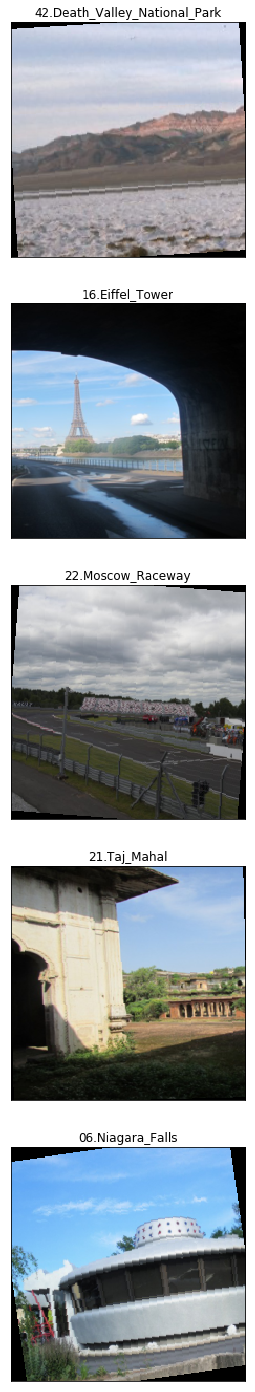

In [14]:
fig = plt.figure(figsize = (25, 25))

for index in np.arange(5):
    
    axis = fig.add_subplot(
        5, 
        1, 
        index + 1, 
        xticks = [],
        yticks = []
    )
    
    imshow(images[index])
    
    axis.set_title(
        train_data.classes[labels[index]],
        wrap = True,
    )

### Initialize use_cuda variable

In [15]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [29]:
## Select loss function

criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    
    ## Select and return an optimizer
    
    return optim.SGD(model.parameters(), lr = 0.01)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [30]:
classes = train_data.classes

In [31]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    
    ## Choose an architecture, and complete the class
    
    def __init__(self):
        
        super(Net, self).__init__()
        
        ## Define layers of a CNN

        self.conv_1 = nn.Conv2d(
            3,
            16,
            kernel_size = 3,
            padding = 0
        )
        
        self.conv_2 = nn.Conv2d(
            16,
            32,
            kernel_size = 3,
            padding = 0
        )
        
        self.conv_3 = nn.Conv2d(
            32,
            64,
            kernel_size = 3,
            padding = 0
        )
        
        self.conv_4 = nn.Conv2d(
            64,
            128,
            kernel_size = 3,
            padding = 0
        )
        
        self.conv_5 = nn.Conv2d(
            128,
            256,
            kernel_size = 3,
            padding = 0
        )
        
        self.max_pool = nn.MaxPool2d(2, 2)
        
        self.fc_1 = nn.Linear(256 * 5 * 5, 512)
        
        self.fc_2 = nn.Linear(512, 128)
        
        self.fc_3 = nn.Linear(128, len(classes))
        
        self.dropout = nn.Dropout(0.3)
        
    
    def forward(self, x):
        
        ## Define forward behavior

        x = self.max_pool(F.relu(self.conv_1(x)))
        
        x = self.max_pool(F.relu(self.conv_2(x)))
        
        x = self.max_pool(F.relu(self.conv_3(x)))
        
        x = self.max_pool(F.relu(self.conv_4(x)))
        
        x = self.max_pool(F.relu(self.conv_5(x)))
        
        x = x.view(-1, 256 * 5 * 5)
        
        x = self.dropout(x)
        
        x = F.relu(self.fc_1(x))
        
        x = self.dropout(x)
        
        x = F.relu(self.fc_2(x))
        
        x = self.dropout(x)
        
        x = F.relu(self.fc_3(x))
        
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  

The structure of the neural network consists of 5 convolutional layers, which have MaxPooling.

After the convolutional layers, there are three linear layers, fully connected, and containing dropouts. This in order to avoid overfitting.

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [32]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            optimizer.zero_grad()
            
            output = model(data)
            
            loss = criterion(output, target)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            
        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 

            output = model(data)
            
            loss = criterion(output, target)
            
            valid_loss += (((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss)))
            
        # print training/validation statistics 
        
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if valid_loss <= valid_loss_min:
            
            torch.save(model.state_dict(), save_path)
            
            print(
                f'Validation loss decreased: ({valid_loss_min:.6f} to {valid_loss:.6f}). Model Saved.'
            )
            
            valid_loss_min = valid_loss
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [85]:
def custom_weight_init(m):
    ## Implement a weight initialization strategy

    isLinear = m.__class__.__name__.find('Linear') != -1
    
    if (isLinear):
        
        n = m.in_features
        
        y = 1.0 / np.sqrt(n)
        
        m.weight.data.normal_(0, y)
        
        m.bias.data.fill_(0)
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)

model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.912465 	Validation Loss: 3.912395
Validation loss decreased: (inf to 3.912395). Model Saved.
Epoch: 2 	Training Loss: 3.911955 	Validation Loss: 3.913048
Epoch: 3 	Training Loss: 3.912159 	Validation Loss: 3.913418
Epoch: 4 	Training Loss: 3.911535 	Validation Loss: 3.913081
Epoch: 5 	Training Loss: 3.909301 	Validation Loss: 3.911985
Validation loss decreased: (3.912395 to 3.911985). Model Saved.
Epoch: 6 	Training Loss: 3.904640 	Validation Loss: 3.899464
Validation loss decreased: (3.911985 to 3.899464). Model Saved.
Epoch: 7 	Training Loss: 3.889668 	Validation Loss: 3.883357
Validation loss decreased: (3.899464 to 3.883357). Model Saved.
Epoch: 8 	Training Loss: 3.877519 	Validation Loss: 3.879591
Validation loss decreased: (3.883357 to 3.879591). Model Saved.
Epoch: 9 	Training Loss: 3.866606 	Validation Loss: 3.870746
Validation loss decreased: (3.879591 to 3.870746). Model Saved.
Epoch: 10 	Training Loss: 3.866012 	Validation Loss: 3.849870
Validation

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [86]:
## You may change the number of epochs if you'd like,
## but changing it is not required

num_epochs = 100

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.912935 	Validation Loss: 3.913314
Validation loss decreased: (inf to 3.913314). Model Saved.
Epoch: 2 	Training Loss: 3.912764 	Validation Loss: 3.913866
Epoch: 3 	Training Loss: 3.912600 	Validation Loss: 3.914265
Epoch: 4 	Training Loss: 3.912267 	Validation Loss: 3.914567
Epoch: 5 	Training Loss: 3.912042 	Validation Loss: 3.914838
Epoch: 6 	Training Loss: 3.911986 	Validation Loss: 3.915054
Epoch: 7 	Training Loss: 3.911986 	Validation Loss: 3.915229
Epoch: 8 	Training Loss: 3.912084 	Validation Loss: 3.915366
Epoch: 9 	Training Loss: 3.911883 	Validation Loss: 3.915350
Epoch: 10 	Training Loss: 3.911889 	Validation Loss: 3.915392
Epoch: 11 	Training Loss: 3.911733 	Validation Loss: 3.915456
Epoch: 12 	Training Loss: 3.911949 	Validation Loss: 3.915399
Epoch: 13 	Training Loss: 3.911627 	Validation Loss: 3.915248
Epoch: 14 	Training Loss: 3.911519 	Validation Loss: 3.915001
Epoch: 15 	Training Loss: 3.911385 	Validation Loss: 3.914797
Epoch: 16 	Training 

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [41]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [87]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.324581


Test Accuracy: 40% (500/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [33]:
### Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_transfer = {'train': None, 'valid': None, 'test': None}

train_data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(9),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]
    )
])

test_data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]
    )
])

train_data = datasets.ImageFolder(
    './landmark_images/train/',
    transform = train_data_transform
)

test_data = datasets.ImageFolder(
    './landmark_images/test/',
    transform = test_data_transform
)

data_indices = list(range(len(train_data)))

np.random.shuffle(data_indices)

split_reference = int(np.floor(0.2 * len(train_data)))

train_indices = data_indices[split_reference:]

validation_indices = data_indices[:split_reference]

validation_sampler = SubsetRandomSampler(validation_indices)

train_sampler = SubsetRandomSampler(train_indices)

loaders_transfer["train"] = torch.utils.data.DataLoader(
    train_data,
    batch_size = 5,
    sampler = train_sampler,
    num_workers = 0
)

loaders_transfer["valid"] = torch.utils.data.DataLoader(
    train_data, 
    batch_size = 5,      
    sampler = validation_sampler, 
    num_workers = 0
)

loaders_transfer["test"] = torch.utils.data.DataLoader(
    test_data,
    batch_size = 5
)

print(len(loaders_scratch["train"]))

print(len(loaders_scratch["valid"]))

print(len(loaders_scratch["test"]))

800
200
250


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [34]:
## Select loss function

criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    
    ## Select and return optimizer

    return optim.SGD(model.classifier.parameters(), lr = 0.01)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [35]:
## Specify model architecture

model_transfer = models.vgg16(pretrained = True)

In [36]:
for param in model_transfer.features.parameters():
    
    param.requires_grad = False
    
number_in_features = model_transfer.classifier[6].in_features

last_layer = nn.Linear(number_in_features, len(classes))

model_transfer.classifier[6] = last_layer

In [37]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [38]:
#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

At this stage of the project, I chose to choose the VGG16 pre-trained model.

And in order to get better performance, I froze its parameters.

Thus, replacing only the last layer in order to adjust the pre-trained model the classes used in the current problematic.

I believe this model is ideal for getting a great result due to its documented accuracy in similar problems.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [39]:
# Train the model and save the best model parameters at filepath 'model_transfer.pt'

train(
    15,
    loaders_transfer,
    model_transfer,
    get_optimizer_transfer(model_transfer),
    criterion_transfer,
    use_cuda,
    'model_transfer.pt'
)


#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.402503 	Validation Loss: 1.788200
Validation loss decreased: (inf to 1.788200). Model Saved.
Epoch: 2 	Training Loss: 1.799140 	Validation Loss: 1.726044
Validation loss decreased: (1.788200 to 1.726044). Model Saved.
Epoch: 3 	Training Loss: 1.602310 	Validation Loss: 1.602364
Validation loss decreased: (1.726044 to 1.602364). Model Saved.
Epoch: 4 	Training Loss: 1.509368 	Validation Loss: 1.531523
Validation loss decreased: (1.602364 to 1.531523). Model Saved.
Epoch: 5 	Training Loss: 1.388128 	Validation Loss: 1.599108
Epoch: 6 	Training Loss: 1.342449 	Validation Loss: 1.562824
Epoch: 7 	Training Loss: 1.288908 	Validation Loss: 1.560470
Epoch: 8 	Training Loss: 1.262013 	Validation Loss: 1.545987
Epoch: 9 	Training Loss: 1.223359 	Validation Loss: 1.529631
Validation loss decreased: (1.531523 to 1.529631). Model Saved.
Epoch: 10 	Training Loss: 1.161759 	Validation Loss: 1.411954
Validation loss decreased: (1.529631 to 1.411954). Model Saved.
Epoch: 11 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [42]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.178936


Test Accuracy: 69% (874/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [44]:
import cv2

from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    
    ## Return the names of the top k landmarks predicted by the transfer learned CNN
    
    image_readed = Image.open(img_path)
    
    image_transform = transforms.Compose([
        transforms.RandomResizedCrop(224), 
        transforms.ToTensor(),
        transforms.Normalize(
            [0.5, 0.5, 0.5],
            [0.5, 0.5, 0.5])
    ])
    
    image_transformed = image_transform(image_readed)
    
    image = torch.unsqueeze(image_transformed, 0)
    
    if (use_cuda):
        
        image = image.cuda()
        
    model_transfer.eval()
    
    with torch.no_grad():
        
        output = model_transfer(image)
        
    _, index = torch.topk(output.squeeze(0), k)
        
    class_list = loaders_transfer["train"].dataset.classes.copy()
    
    return [class_list[i] for i in index]

# test on a sample image

predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['09.Golden_Gate_Bridge',
 '38.Forth_Bridge',
 '03.Dead_Sea',
 '30.Brooklyn_Bridge',
 '28.Sydney_Harbour_Bridge']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

09.Golden_Gate_Bridge
03.Dead_Sea
38.Forth_Bridge


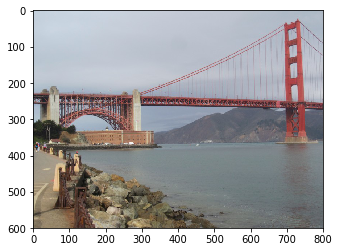

In [46]:
def suggest_locations(img_path):
    
    # get landmark predictions
    
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## Display image and display landmark predictions

    image_readed = Image.open(img_path)
    
    plt.imshow(image_readed)
    
    for i in range(len(predicted_landmarks)):
        
        print(predicted_landmarks[i])

# test on a sample image

suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

I was surprised by the result of the model.

Although it's not perfect, it has achieved landmarks that are difficult to recognize and appear to be quite generic. Such as the "Great Barrier Reef" and "Death Valley National Park".

It has space to increase your performance, with some interesting points that can be explored:

- Perform training with a higher number of seasons.

- Enlarge the image dataset.

- Remodel the model used. Incrementing new layers.

42.Death_Valley_National_Park
36.Badlands_National_Park
01.Mount_Rainier_National_Park


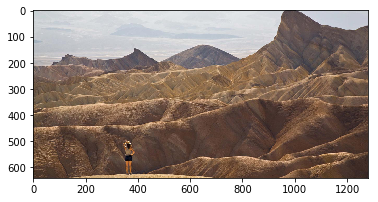

In [48]:
## Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

suggest_locations('./suggest_locations/death_valley_national_park.jpg')

10.Edinburgh_Castle
41.Machu_Picchu
48.Whitby_Abbey


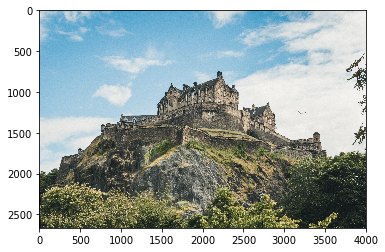

In [49]:
suggest_locations('./suggest_locations/edinburgh_castle.jpeg')

16.Eiffel_Tower
14.Terminal_Tower
19.Vienna_City_Hall


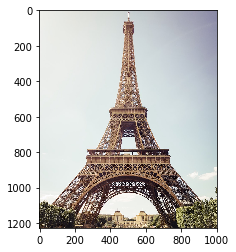

In [50]:
suggest_locations('./suggest_locations/eiffel_tower.jpeg')

34.Great_Barrier_Reef
03.Dead_Sea
27.Seattle_Japanese_Garden


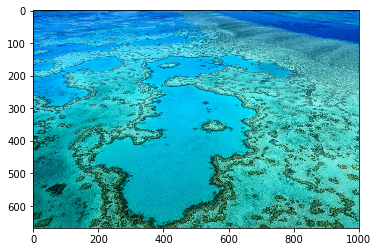

In [51]:
suggest_locations('./suggest_locations/great_barrier_reef.jpg')

16.Eiffel_Tower
33.Sydney_Opera_House
47.Prague_Astronomical_Clock


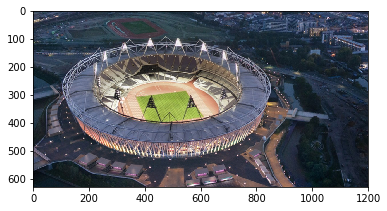

In [52]:
suggest_locations('./suggest_locations/london_olympic_stadium.jpg')

22.Moscow_Raceway
25.Banff_National_Park
29.Petronas_Towers


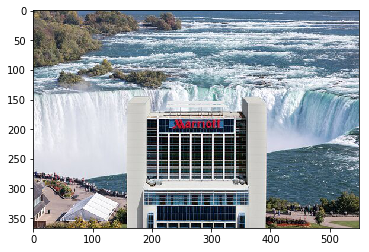

In [53]:
suggest_locations('./suggest_locations/niagara_falls.jpg')

21.Taj_Mahal
19.Vienna_City_Hall
12.Kantanagar_Temple


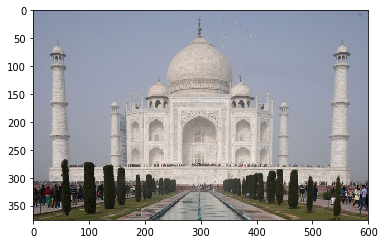

In [54]:
suggest_locations('./suggest_locations/taj_mahal.jpg')